<a href="https://colab.research.google.com/github/nehafarath/predicting-adult-income-level/blob/main/census_income_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

## Import Datasets

In [ ]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

In [ ]:
train = pd.read_csv('census-income.data.csv', names=columns)
test = pd.read_csv('census-income.test.csv', names=columns, skiprows=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours/Week      32561 non-null  int64 
 13  Native country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Cleaning Data

In [ ]:
df = pd.concat([train, test], axis=0)

In [ ]:
df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

In [ ]:
for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

## Removing unknowns

In [ ]:
df.replace(' ?', np.nan, inplace=True)

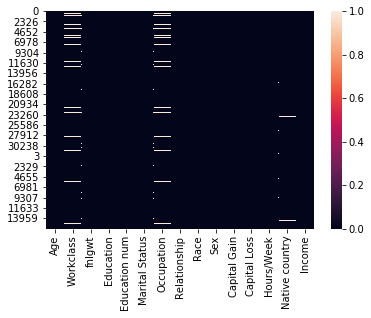

In [ ]:
sn.heatmap(df.isnull())

## Converting object to int


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       46042 non-null  object
 2   fnlgwt          48841 non-null  int64 
 3   Education       48841 non-null  object
 4   Education num   48841 non-null  int64 
 5   Marital Status  48841 non-null  object
 6   Occupation      46032 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Sex             48841 non-null  object
 10  Capital Gain    48841 non-null  int64 
 11  Capital Loss    48841 non-null  int64 
 12  Hours/Week      48841 non-null  int64 
 13  Native country  47984 non-null  object
 14  Income          48841 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 7.2+ MB


In [ ]:
df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

In [ ]:
df.head()

,Age,fnlgwt,Education,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,Bachelors,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,11th,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Bachelors,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop('Education', axis=1,inplace=True)

In [ ]:
df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## VISUALIZATION

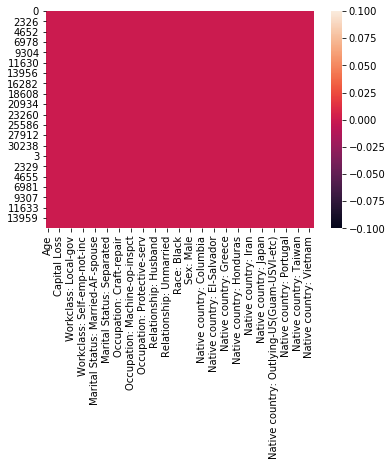

In [ ]:
sn.heatmap(df.isnull())

## Preparing data for Training and testing

In [ ]:
X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# CLASSIFICATION

### LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l2', C = .001, class_weight='balanced')

In [ ]:
lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test, y_pred)

[[5954 2199]
 [ 263 1353]]


0.7479782986999692

### LDA Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit( X_train, y_train )
tree_predict = clf.predict(X_test)
metrics.accuracy_score( y_test, tree_predict )

0.8412324700583478

In [ ]:
print(confusion_matrix(y_test,tree_predict))
LDA = accuracy_score(y_test, tree_predict)
print("The Accuracy for LDA is {}".format(LDA))

[[7464  689]
 [ 862  754]]
The Accuracy for LDA is 0.8412324700583478


### KNN

In [ ]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [ ]:
clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

[[7595  558]
 [1088  528]]
The Accuracy for KNN is 0.8315078308936431


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV

In [ ]:
svc = SVC(C = 1.0, kernel = "linear" )
svc.fit( X_train, y_train )
svc_predict = svc.predict( X_test )

In [ ]:
print(confusion_matrix(y_test,svc_predict))
SVMA = accuracy_score(y_test, svc_predict)
print("The Accuracy for SVM is {}".format(SVMA))

[[8138   15]
 [1586   30]]
The Accuracy for SVM is 0.8361142389190296
